# Análise de dados eleitorais: 
### Análise por gênero e faixa etária
Análise de dados eleitorais de 2020 utilizando como principal assunto o gênero e faixa etária dos eleitores.

In [1]:
import pandas as pd
low_memory=False
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_columns = 80
pd.options.display.max_rows = 90

In [2]:
file = r'C:\Users\lucas\Documents\analise_dados\perfil_eleitorado_ATUAL.csv'
df = pd.read_csv(file, delimiter=';',
                 error_bad_lines=False, encoding='latin1')

In [3]:
df.shape

(4306904, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4306904 entries, 0 to 4306903
Data columns (total 21 columns):
 #   Column                      Dtype 
---  ------                      ----- 
 0   DT_GERACAO                  object
 1   HH_GERACAO                  object
 2   ANO_ELEICAO                 int64 
 3   SG_UF                       object
 4   CD_MUNICIPIO                int64 
 5   NM_MUNICIPIO                object
 6   CD_MUN_SIT_BIOMETRIA        int64 
 7   DS_MUN_SIT_BIOMETRIA        object
 8   NR_ZONA                     int64 
 9   CD_GENERO                   int64 
 10  DS_GENERO                   object
 11  CD_ESTADO_CIVIL             int64 
 12  DS_ESTADO_CIVIL             object
 13  CD_FAIXA_ETARIA             int64 
 14  DS_FAIXA_ETARIA             object
 15  CD_GRAU_ESCOLARIDADE        int64 
 16  DS_GRAU_ESCOLARIDADE        object
 17  QT_ELEITORES_PERFIL         int64 
 18  QT_ELEITORES_BIOMETRIA      int64 
 19  QT_ELEITORES_DEFICIENCIA    int64 
 20  QT

In [5]:
df.sample(10)

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,CD_MUN_SIT_BIOMETRIA,DS_MUN_SIT_BIOMETRIA,NR_ZONA,CD_GENERO,DS_GENERO,CD_ESTADO_CIVIL,DS_ESTADO_CIVIL,CD_FAIXA_ETARIA,DS_FAIXA_ETARIA,CD_GRAU_ESCOLARIDADE,DS_GRAU_ESCOLARIDADE,QT_ELEITORES_PERFIL,QT_ELEITORES_BIOMETRIA,QT_ELEITORES_DEFICIENCIA,QT_ELEITORES_INC_NM_SOCIAL
2268091,11/11/2020,21:20:42,9999,MA,7676,COLINAS,-1,#NULO#,29,2,MASCULINO,3,CASADO,6569,65 a 69 anos,8,SUPERIOR COMPLETO,13,13,0,0
1809929,11/11/2020,21:20:42,9999,MG,41289,PAI PEDRO,-1,#NULO#,226,2,MASCULINO,3,CASADO,4549,45 a 49 anos,6,ENSINO MÉDIO COMPLETO,11,6,0,0
3874039,11/11/2020,21:20:42,9999,SP,66915,MENDONÇA,-1,#NULO#,64,2,MASCULINO,9,DIVORCIADO,3034,30 a 34 anos,8,SUPERIOR COMPLETO,1,1,0,0
4089245,11/11/2020,21:20:42,9999,RJ,60011,RIO DE JANEIRO,-1,#NULO#,10,4,FEMININO,5,VIÚVO,7074,70 a 74 anos,8,SUPERIOR COMPLETO,14,12,0,0
1489135,11/11/2020,21:20:42,9999,PR,79294,TOMAZINA,-1,#NULO#,19,4,FEMININO,1,SOLTEIRO,6569,65 a 69 anos,8,SUPERIOR COMPLETO,2,2,0,0
1205874,11/11/2020,21:20:42,9999,GO,92932,CAMPINORTE,-1,#NULO#,50,4,FEMININO,7,SEPARADO JUDICIALMENTE,3539,35 a 39 anos,7,SUPERIOR INCOMPLETO,1,1,0,0
1362327,11/11/2020,21:20:42,9999,MG,46175,INHAPIM,-1,#NULO#,128,2,MASCULINO,1,SOLTEIRO,3034,30 a 34 anos,5,ENSINO MÉDIO INCOMPLETO,266,17,0,0
331227,11/11/2020,21:20:42,9999,GO,93343,ÁGUAS LINDAS DE GOIÁS,-1,#NULO#,28,2,MASCULINO,7,SEPARADO JUDICIALMENTE,5559,55 a 59 anos,2,LÊ E ESCREVE,5,5,0,0
4102896,11/11/2020,21:20:42,9999,SP,68314,PAULÍNIA,-1,#NULO#,323,4,FEMININO,3,CASADO,8084,80 a 84 anos,3,ENSINO FUNDAMENTAL INCOMPLETO,113,18,1,0
1328651,11/11/2020,21:20:42,9999,CE,13897,FORTALEZA,-1,#NULO#,116,0,NÃO INFORMADO,1,SOLTEIRO,5559,55 a 59 anos,3,ENSINO FUNDAMENTAL INCOMPLETO,1,0,0,0


In [6]:
df.groupby('CD_GENERO')['DS_GENERO'].max()

CD_GENERO
0    NÃO INFORMADO
2        MASCULINO
4         FEMININO
Name: DS_GENERO, dtype: object

In [7]:
df.groupby('DS_GENERO')['QT_ELEITORES_PERFIL'].max().sort_values(ascending=False)

DS_GENERO
MASCULINO        6448
FEMININO         5487
NÃO INFORMADO     140
Name: QT_ELEITORES_PERFIL, dtype: int64

- __Gráfico contendo a quantidade de eleitores de acordo com a faixa etária da população em jacareí.__

<AxesSubplot:title={'center':'Quantidade de eleitores por faixa etária em Jacareí '}, xlabel='Faixa Etária', ylabel='Quantidade de eleitores'>

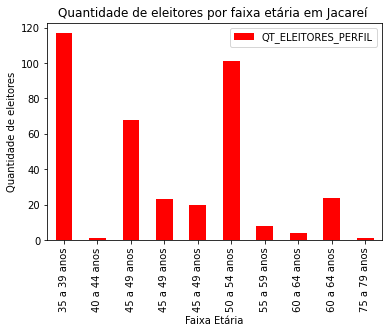

In [8]:
mun = df.query('NM_MUNICIPIO == "JACAREÍ"')
mun.tail(10).plot(kind='bar',
                 x='DS_FAIXA_ETARIA', y='QT_ELEITORES_PERFIL', color='RED', 
                  title='Quantidade de eleitores por faixa etária em Jacareí ', 
                  xlabel='Faixa Etária', ylabel='Quantidade de eleitores')

- __Gráfico contendo a quantidade de eleitores de acordo com a faixa etária da população em São José dos Campos.__

<AxesSubplot:title={'center':'Faixa etária de eleitores em São José dos Campos'}, xlabel='Faixa Etária'>

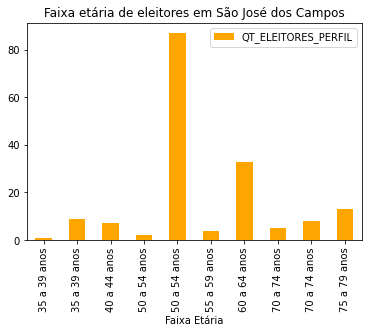

In [9]:
sjc = df.query('NM_MUNICIPIO == "SÃO JOSÉ DOS CAMPOS"')
sjc.tail(10).plot(kind='bar',title="Faixa etária de eleitores em São José dos Campos",
        x= 'DS_FAIXA_ETARIA', y='QT_ELEITORES_PERFIL', color='ORANGE', 
                  xlabel='Faixa Etária')

- __Gráfico contendo a quantidade de eleitores de acordo com a faixa etária da população em Caçapava.__

<AxesSubplot:title={'center':'Faixa etária de eleitores em Caçapava'}, xlabel='Faixa Etária'>

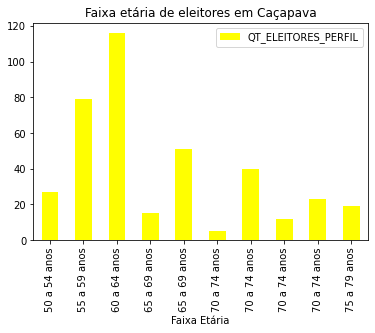

In [10]:
sjc = df.query('NM_MUNICIPIO == "CAÇAPAVA"')
sjc.tail(10).plot(kind='bar',title="Faixa etária de eleitores em Caçapava",
        x= 'DS_FAIXA_ETARIA', y='QT_ELEITORES_PERFIL', color='YELLOW', 
                  xlabel='Faixa Etária')

- __Gráfico comparativo entre genêros na eleição brasileira .__

<AxesSubplot:title={'center':'Gráfico comparativo entre gêneros'}, ylabel='DS_GENERO'>

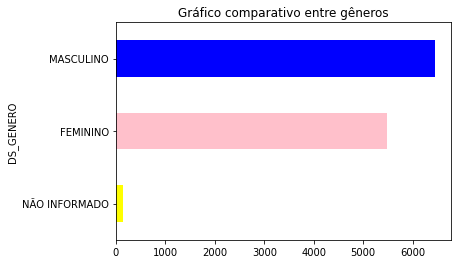

In [11]:
df.groupby('DS_GENERO')['QT_ELEITORES_PERFIL'].max().sort_values().plot(kind='barh', 
                                                                        color=['yellow', 'pink', 'blue'], 
                                                                        title='Gráfico comparativo entre gêneros')

- __Gráfico contendo a quantidade de eleitores femininos por faixa etaria no Brasil.__

<AxesSubplot:title={'center':'Faixa etária de eleitores do gênero feminino'}, xlabel='Faixa Etária'>

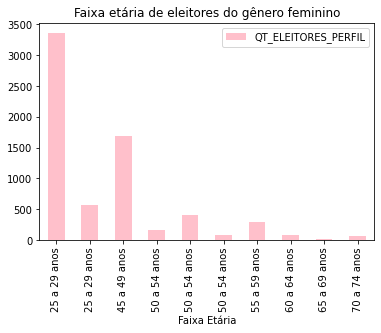

In [12]:
fhf = df.query('DS_GENERO == "FEMININO"')
fhf.tail(10).plot(kind='bar', title="Faixa etária de eleitores do gênero feminino",
        x= 'DS_FAIXA_ETARIA', y='QT_ELEITORES_PERFIL', color='PINK', xlabel='Faixa Etária')

- __Gráfico contendo a quantidade de eleitores masculinos por faixa etária no Brasil.__

<AxesSubplot:title={'center':'Faixa etária de eleitores do gênero masculino'}, xlabel='Faixa Etária'>

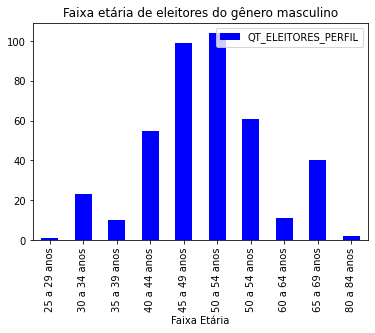

In [13]:
fhm = df.query('DS_GENERO == "MASCULINO"')
fhm.tail(10).plot(kind='bar', title="Faixa etária de eleitores do gênero masculino",
        x= 'DS_FAIXA_ETARIA', y='QT_ELEITORES_PERFIL', color='BLUE', xlabel='Faixa Etária')

- __Gráfico contendo a quantidade de eleitores femininos por grau de escolaridade.__

<AxesSubplot:xlabel='Grau de Escolaridade'>

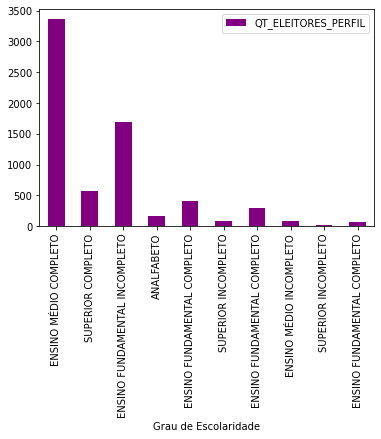

In [25]:
fhf.tail(10).plot(kind='bar', x ='DS_GRAU_ESCOLARIDADE', y='QT_ELEITORES_PERFIL', 
                  color='PURPLE', xlabel='Grau de Escolaridade' )

- __Gráfico contendo a quantidade de eleitores masculinos por grau de escolaridade.__

<AxesSubplot:xlabel='Grau de Escolaridade'>

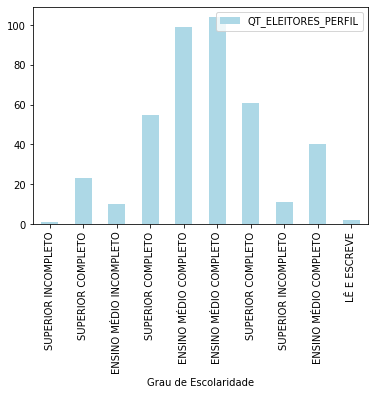

In [27]:
fhm.tail(10).plot(kind='bar', x ='DS_GRAU_ESCOLARIDADE', y='QT_ELEITORES_PERFIL', 
                  color='LIGHTBLUE', xlabel='Grau de Escolaridade' )